### Telecom Churn Case Study Hackathon
Predict churning customers for a Telecom company based on temporal behaviour
The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

01. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

02. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

03. Recommend strategies to manage customer churn based on the observations.

Step 1: Data Preparation

In [1]:
#Import the necessary package to read the file and suppress the warnings
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data from CSV file
telecom_train_df = pd.read_csv('../input/telecom-churn-case-study-hackathon-c40/train.csv')
telecom_train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [3]:
#identify the data-types for each attributes
telecom_train_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [4]:
#We have identified that in total 69999 rowsand 172 columns exist in the dataframe
print(telecom_train_df.shape)

(69999, 172)


In [5]:
# Identify the 25%,50%,75% values for the numeric variables
telecom_train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [6]:
#Identify the number of null values in each columns
telecom_train_df.isnull().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [7]:
# Identify the columns which has the null values
for column in telecom_train_df.columns:
    print(column+"  "+str(telecom_train_df[column].isnull().sum()))

id  0
circle_id  0
loc_og_t2o_mou  702
std_og_t2o_mou  702
loc_ic_t2o_mou  702
last_date_of_month_6  0
last_date_of_month_7  399
last_date_of_month_8  733
arpu_6  0
arpu_7  0
arpu_8  0
onnet_mou_6  2768
onnet_mou_7  2687
onnet_mou_8  3703
offnet_mou_6  2768
offnet_mou_7  2687
offnet_mou_8  3703
roam_ic_mou_6  2768
roam_ic_mou_7  2687
roam_ic_mou_8  3703
roam_og_mou_6  2768
roam_og_mou_7  2687
roam_og_mou_8  3703
loc_og_t2t_mou_6  2768
loc_og_t2t_mou_7  2687
loc_og_t2t_mou_8  3703
loc_og_t2m_mou_6  2768
loc_og_t2m_mou_7  2687
loc_og_t2m_mou_8  3703
loc_og_t2f_mou_6  2768
loc_og_t2f_mou_7  2687
loc_og_t2f_mou_8  3703
loc_og_t2c_mou_6  2768
loc_og_t2c_mou_7  2687
loc_og_t2c_mou_8  3703
loc_og_mou_6  2768
loc_og_mou_7  2687
loc_og_mou_8  3703
std_og_t2t_mou_6  2768
std_og_t2t_mou_7  2687
std_og_t2t_mou_8  3703
std_og_t2m_mou_6  2768
std_og_t2m_mou_7  2687
std_og_t2m_mou_8  3703
std_og_t2f_mou_6  2768
std_og_t2f_mou_7  2687
std_og_t2f_mou_8  3703
std_og_t2c_mou_6  2768
std_og_t2c_mou_7  268

In [8]:
# Identify the columns which has the null values
findNullvalues=round(telecom_train_df.isnull().sum()/len(telecom_train_df.index)*100,2).sort_values(ascending=False)
findNullvalues.head(100)

arpu_3g_6                   74.90
count_rech_2g_6             74.90
night_pck_user_6            74.90
arpu_2g_6                   74.90
date_of_last_rech_data_6    74.90
                            ...  
offnet_mou_7                 3.84
loc_og_t2m_mou_7             3.84
roam_ic_mou_7                3.84
std_og_t2t_mou_7             3.84
loc_og_t2t_mou_7             3.84
Length: 100, dtype: float64

In [9]:
#telecom_train_df['total_data_rech_6'] = telecom_train_df.total_rech_data_6 * telecom_train_df.av_rech_amt_data_6
#telecom_train_df['total_data_rech_7'] = telecom_train_df.total_rech_data_7 * telecom_train_df.av_rech_amt_data_7
#telecom_train_df['amt_data_6'] = telecom_train_df.total_rech_amt_6 + telecom_train_df.total_data_rech_6
#telecom_train_df['amt_data_7'] = telecom_train_df.total_rech_amt_7 + telecom_train_df.total_data_rech_7
#telecom_train_df['av_amt_data_6_7'] = (telecom_train_df.amt_data_6 + telecom_train_df.amt_data_7)/2
#print(telecom_train_df.av_amt_data_6_7.quantile(0.7))

In [10]:
#telecom_train_df = telecom_train_df.loc[telecom_train_df.av_amt_data_6_7 >= telecom_train_df.av_amt_data_6_7.quantile(0.5), :]
#telecom_train_df = telecom_train_df.reset_index(drop=True)

In [11]:
# Drop the columns which has more than 80% of rows are null value
for column in telecom_train_df.columns:
    if round(100 * (telecom_train_df[column].isnull().sum()/len(telecom_train_df[column].index)), 2) > 50:
        telecom_train_df.drop(column,axis=1,inplace = True)

In [12]:
# Identify the shape after dropping the columns
telecom_train_df.shape

(69999, 142)

In [13]:
telecom_train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.077730,0.081958,0.075344,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.383189,0.381821,0.573003,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,16.000000,16.000000,29.000000,33.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [14]:
unusedColumn = ['id','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
telecom_train_df = telecom_train_df.drop(unusedColumn,axis=1)

In [15]:
# Identify the dimenstion of the dataset after dropping the columns
telecom_train_df.shape

(69999, 134)

In [16]:
#Validate that if there is any duplicate rows are there in data frame
tc_duplicate = telecom_train_df.copy()
tc_duplicate.drop_duplicates(subset=None, inplace=True)
tc_duplicate.shape
#Conclusion is that there is no duplicate rows exist.

(69999, 134)

In [17]:
telecom_train_df.isnull().sum()

loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
arpu_6                 0
arpu_7                 0
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 134, dtype: int64

In [18]:
#check the dimensions of data
telecom_train_df.ndim

2

In [19]:

telecom_train_df.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=134)

In [20]:
telecom_train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 134 columns):
 #    Column              Dtype  
---   ------              -----  
 0    loc_og_t2o_mou      float64
 1    std_og_t2o_mou      float64
 2    loc_ic_t2o_mou      float64
 3    arpu_6              float64
 4    arpu_7              float64
 5    arpu_8              float64
 6    onnet_mou_6         float64
 7    onnet_mou_7         float64
 8    onnet_mou_8         float64
 9    offnet_mou_6        float64
 10   offnet_mou_7        float64
 11   offnet_mou_8        float64
 12   roam_ic_mou_6       float64
 13   roam_ic_mou_7       float64
 14   roam_ic_mou_8       float64
 15   roam_og_mou_6       float64
 16   roam_og_mou_7       float64
 17   roam_og_mou_8       float64
 18   loc_og_t2t_mou_6    float64
 19   loc_og_t2t_mou_7    float64
 20   loc_og_t2t_mou_8    float64
 21   loc_og_t2m_mou_6    float64
 22   loc_og_t2m_mou_7    float64
 23   loc_og_t2m_mou_8    float64
 24   

In [21]:
numeric_col = telecom_train_df.select_dtypes(include = ['int64','float64']).columns.tolist()
telecom_train_df[numeric_col] = telecom_train_df[numeric_col].apply(lambda x: x.fillna(x.median()))

In [22]:
telecom_train_df.isnull().sum().sum()

0

In [23]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import statsmodels.api as sm
#plt.figure(figsize=(30,20))
#sns.heatmap(df.corr(), annot = True)
#plt.show()
#Check the correlation for the numerical value

In [24]:
colls = []
for col in telecom_train_df.columns:
    if telecom_train_df[col].nunique() <20 and telecom_train_df[col].nunique() >=5:
        colls+=[col]
        print('{} : {}'.format(col,telecom_train_df[col].nunique()))

monthly_2g_6 : 5
monthly_2g_7 : 6
monthly_2g_8 : 6
monthly_3g_6 : 10
monthly_3g_7 : 13
monthly_3g_8 : 12


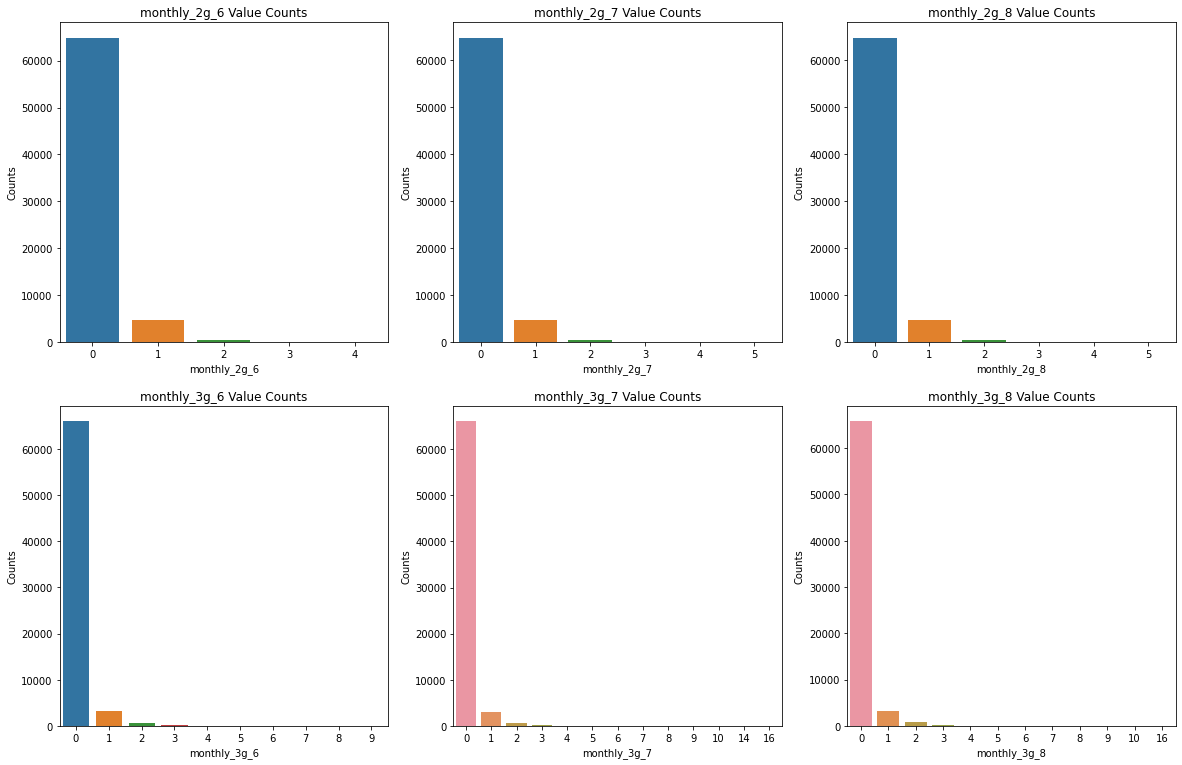

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
plt.figure(figsize=(20,20))
num_size=331
for var_name in colls:
    plt.subplot(num_size)
    sns.countplot(x=telecom_train_df[var_name])
    plt.xlabel(var_name)
    plt.ylabel('Counts')
    plt.title(f"{var_name} Value Counts")
    num_size+=1
plt.show();

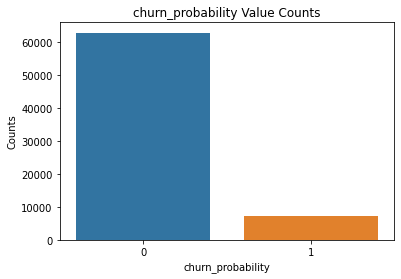

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x=telecom_train_df['churn_probability'])
plt.xlabel('churn_probability')
plt.ylabel('Counts');
plt.title("churn_probability Value Counts");
plt.show()

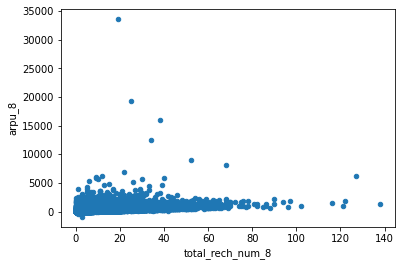

In [27]:
telecom_train_df[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

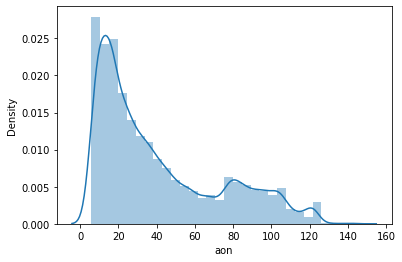

In [28]:
# Assume 30 days per month
sns.distplot(telecom_train_df['aon']/30,bins=30)
plt.show()

In [29]:
tenure_range = [0, 6, 12, 24, 60, 70]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_train_df['tenure_range'] = pd.cut(telecom_train_df['aon']/30, tenure_range, labels=tenure_label)
telecom_train_df['tenure_range'].head()

0    5 Yrs and above
1            1-2 Yrs
2            2-5 Yrs
3            2-5 Yrs
4            1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

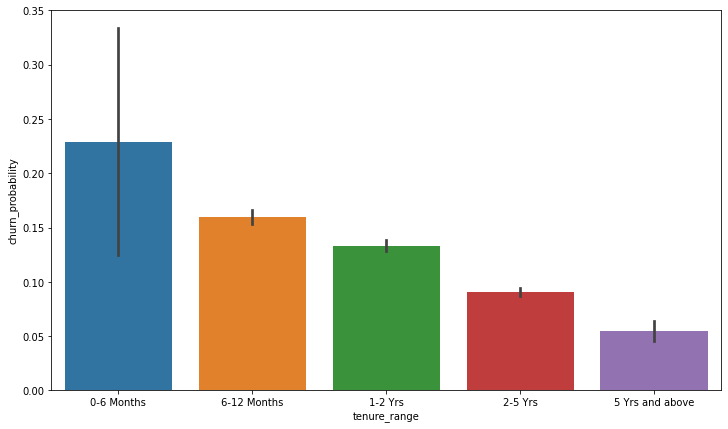

In [30]:
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=telecom_train_df)
plt.show()

In [31]:
telecom_train_df["avg_arpu_6_7"]= (telecom_train_df['arpu_6']+telecom_train_df['arpu_7'])/2
telecom_train_df['avg_arpu_6_7'].head()


0     59.1430
1     61.3935
2     81.9910
3    180.8110
4    184.4495
Name: avg_arpu_6_7, dtype: float64

In [32]:
telecom_corr = telecom_train_df.corr()
telecom_corr.loc[:,:] = np.tril(telecom_corr, k=-1)
telecom_corr = telecom_corr.stack()
telecom_corr
telecom_corr[(telecom_corr > 0.80) | (telecom_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8  arpu_8              0.958333
total_rech_amt_7  arpu_7              0.955298
total_rech_amt_6  arpu_6              0.952776
isd_og_mou_8      isd_og_mou_7        0.947006
avg_arpu_6_7      arpu_7              0.935775
isd_og_mou_7      isd_og_mou_6        0.934022
avg_arpu_6_7      arpu_6              0.931669
isd_og_mou_8      isd_og_mou_6        0.924139
avg_arpu_6_7      total_rech_amt_6    0.910782
                  total_rech_amt_7    0.902143
total_ic_mou_6    loc_ic_mou_6        0.900539
total_ic_mou_8    loc_ic_mou_8        0.891455
total_ic_mou_7    loc_ic_mou_7        0.889104
std_og_t2t_mou_8  onnet_mou_8         0.863487
std_og_t2t_mou_7  onnet_mou_7         0.862711
std_ic_mou_7      std_ic_t2m_mou_7    0.859551
total_og_mou_8    std_og_mou_8        0.859070
std_og_t2m_mou_8  offnet_mou_8        0.858783
total_og_mou_7    std_og_mou_7        0.857000
std_og_t2m_mou_7  offnet_mou_7        0.856417
std_og_t2t_mou_6  onnet_mou_6         0.855852
std_ic_mou_8 

In [33]:
telecom_train_df['churn_probability'].value_counts()/len(telecom_train_df)

0    0.898113
1    0.101887
Name: churn_probability, dtype: float64

In [34]:
telecom_train_df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
         'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
         'last_day_rch_amt_8','arpu_6','arpu_7','total_ic_mou_6','total_ic_mou_7',               
         'std_og_t2t_mou_7','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7','tenure_range'], axis=1, inplace=True)

In [35]:
telecom_train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arpu_8             69999 non-null  float64
 1   onnet_mou_6        69999 non-null  float64
 2   onnet_mou_7        69999 non-null  float64
 3   onnet_mou_8        69999 non-null  float64
 4   offnet_mou_6       69999 non-null  float64
 5   offnet_mou_7       69999 non-null  float64
 6   offnet_mou_8       69999 non-null  float64
 7   std_og_t2t_mou_8   69999 non-null  float64
 8   std_og_t2m_mou_8   69999 non-null  float64
 9   isd_og_mou_8       69999 non-null  float64
 10  og_others_6        69999 non-null  float64
 11  og_others_7        69999 non-null  float64
 12  og_others_8        69999 non-null  float64
 13  total_og_mou_7     69999 non-null  float64
 14  total_og_mou_8     69999 non-null  float64
 15  std_ic_mou_8       69999 non-null  float64
 16  total_ic_mou_8     699

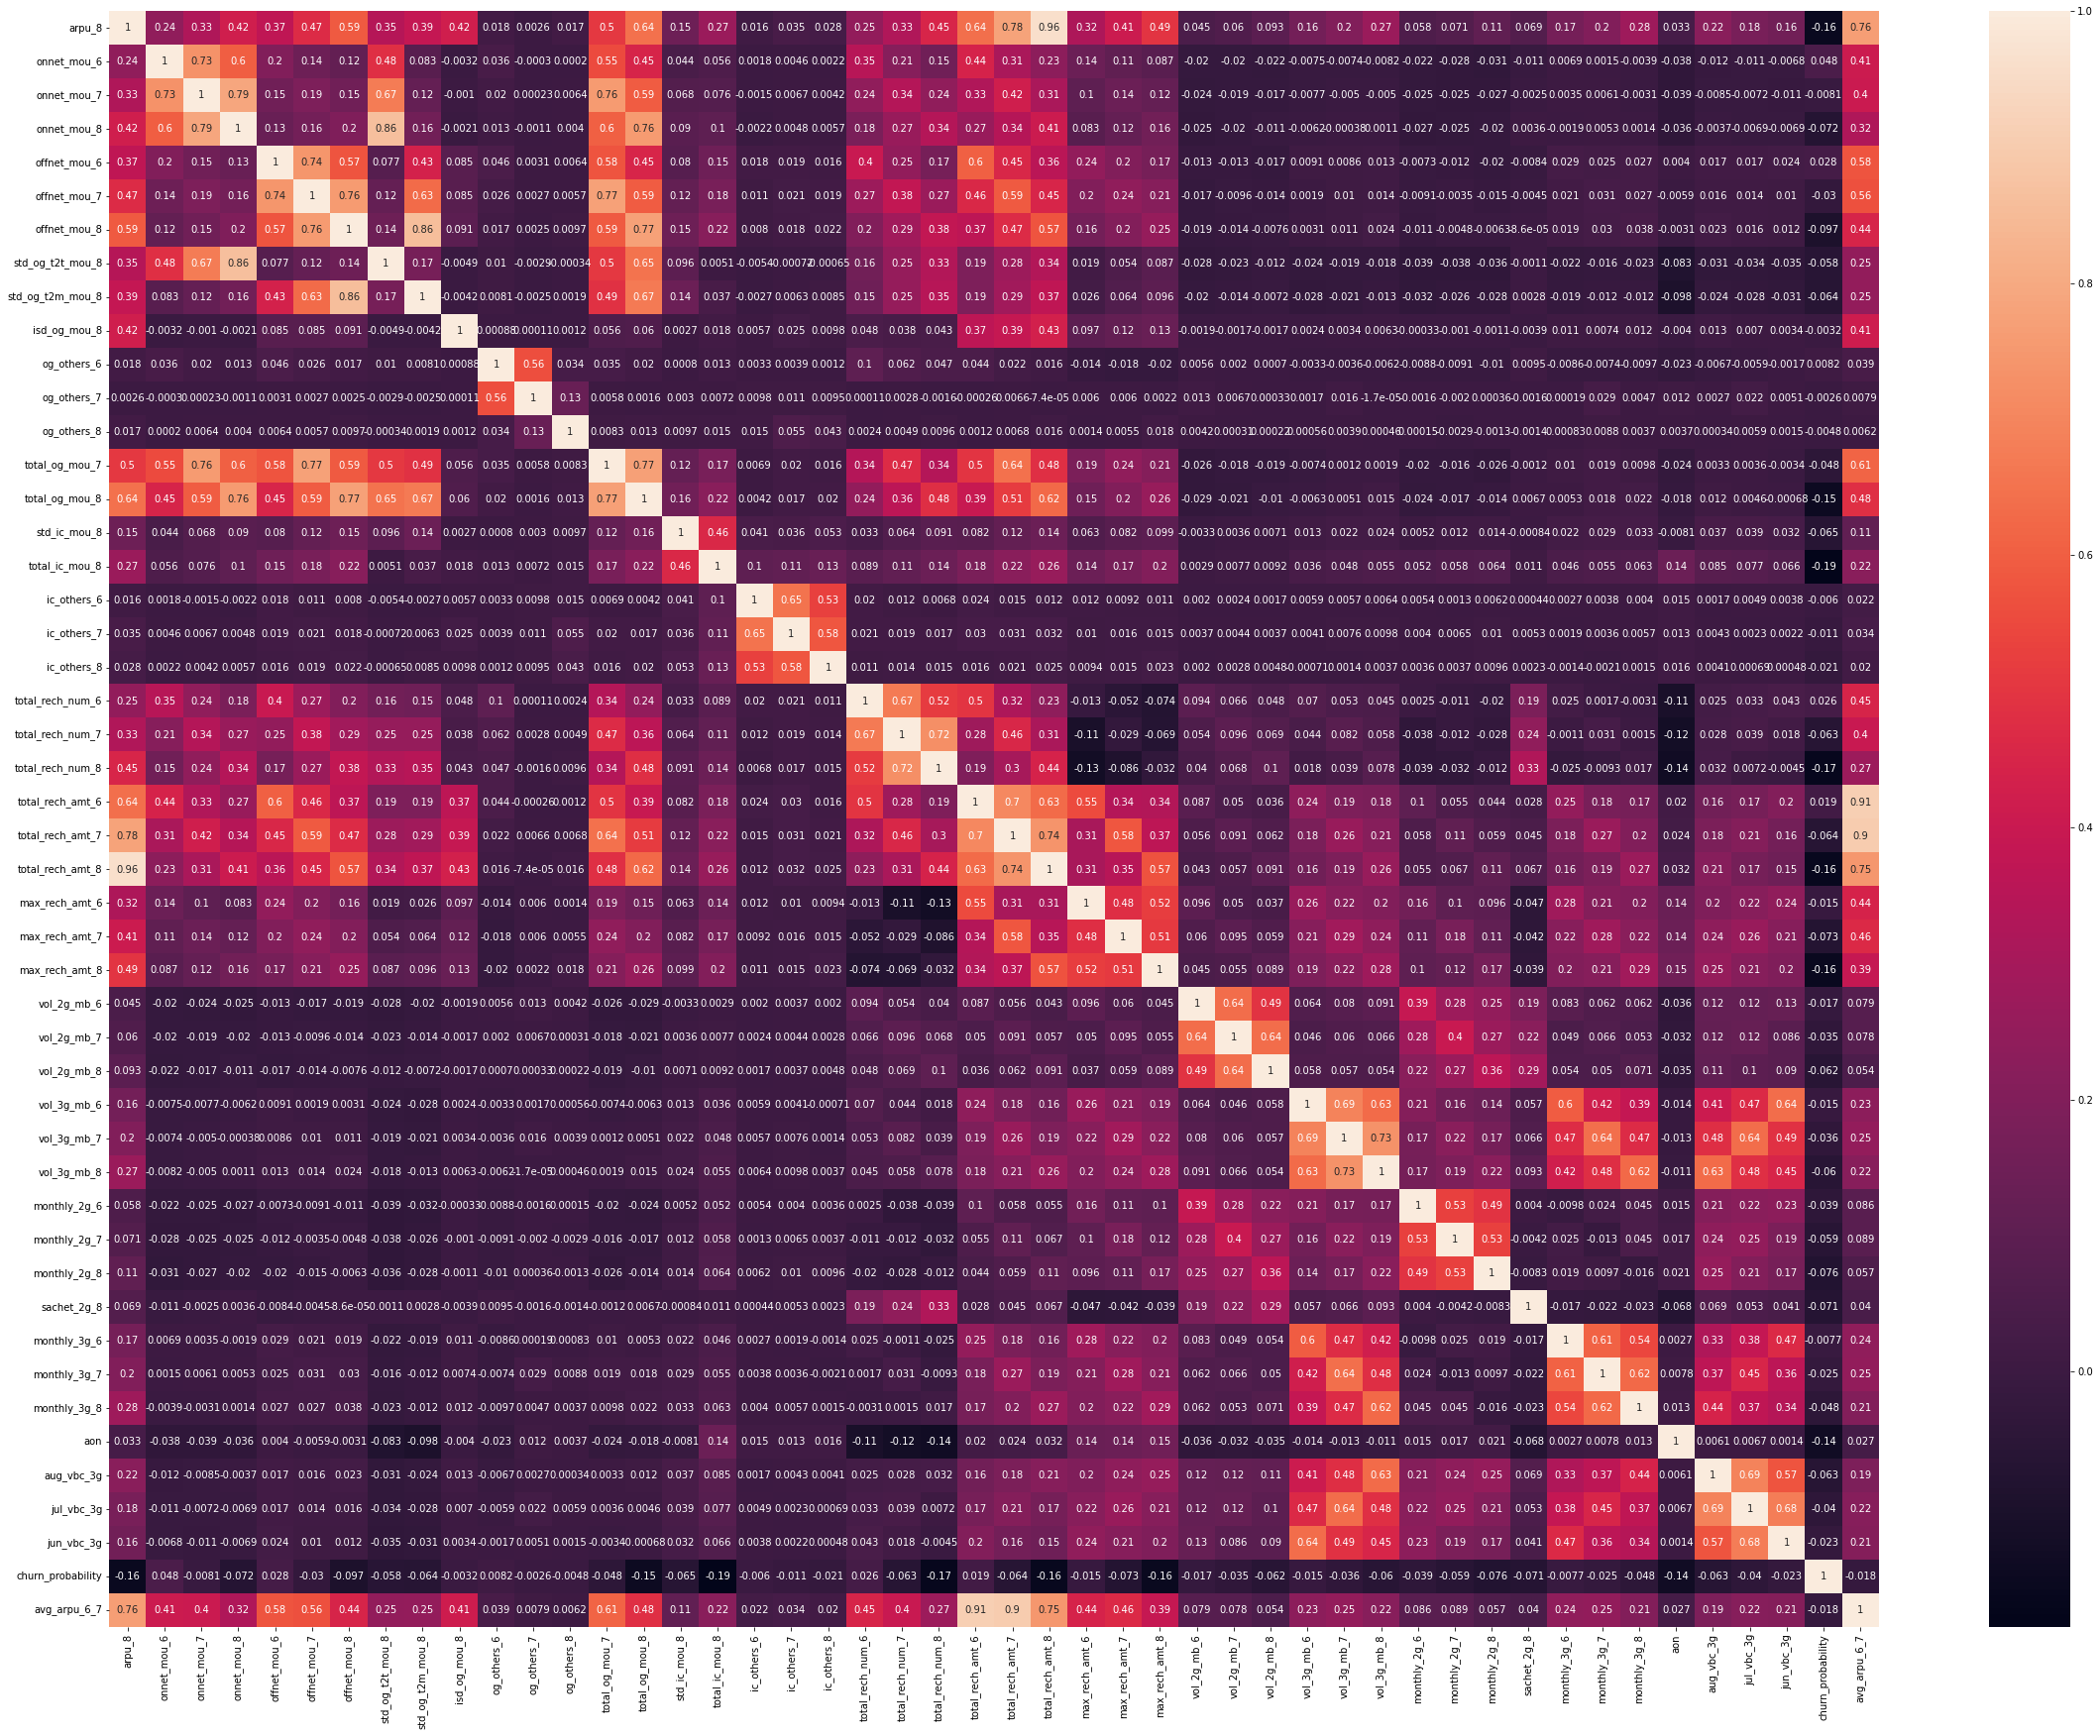

In [36]:
plt.figure(figsize=(40,30))
sns.heatmap(telecom_train_df.corr(), annot = True)
plt.show()

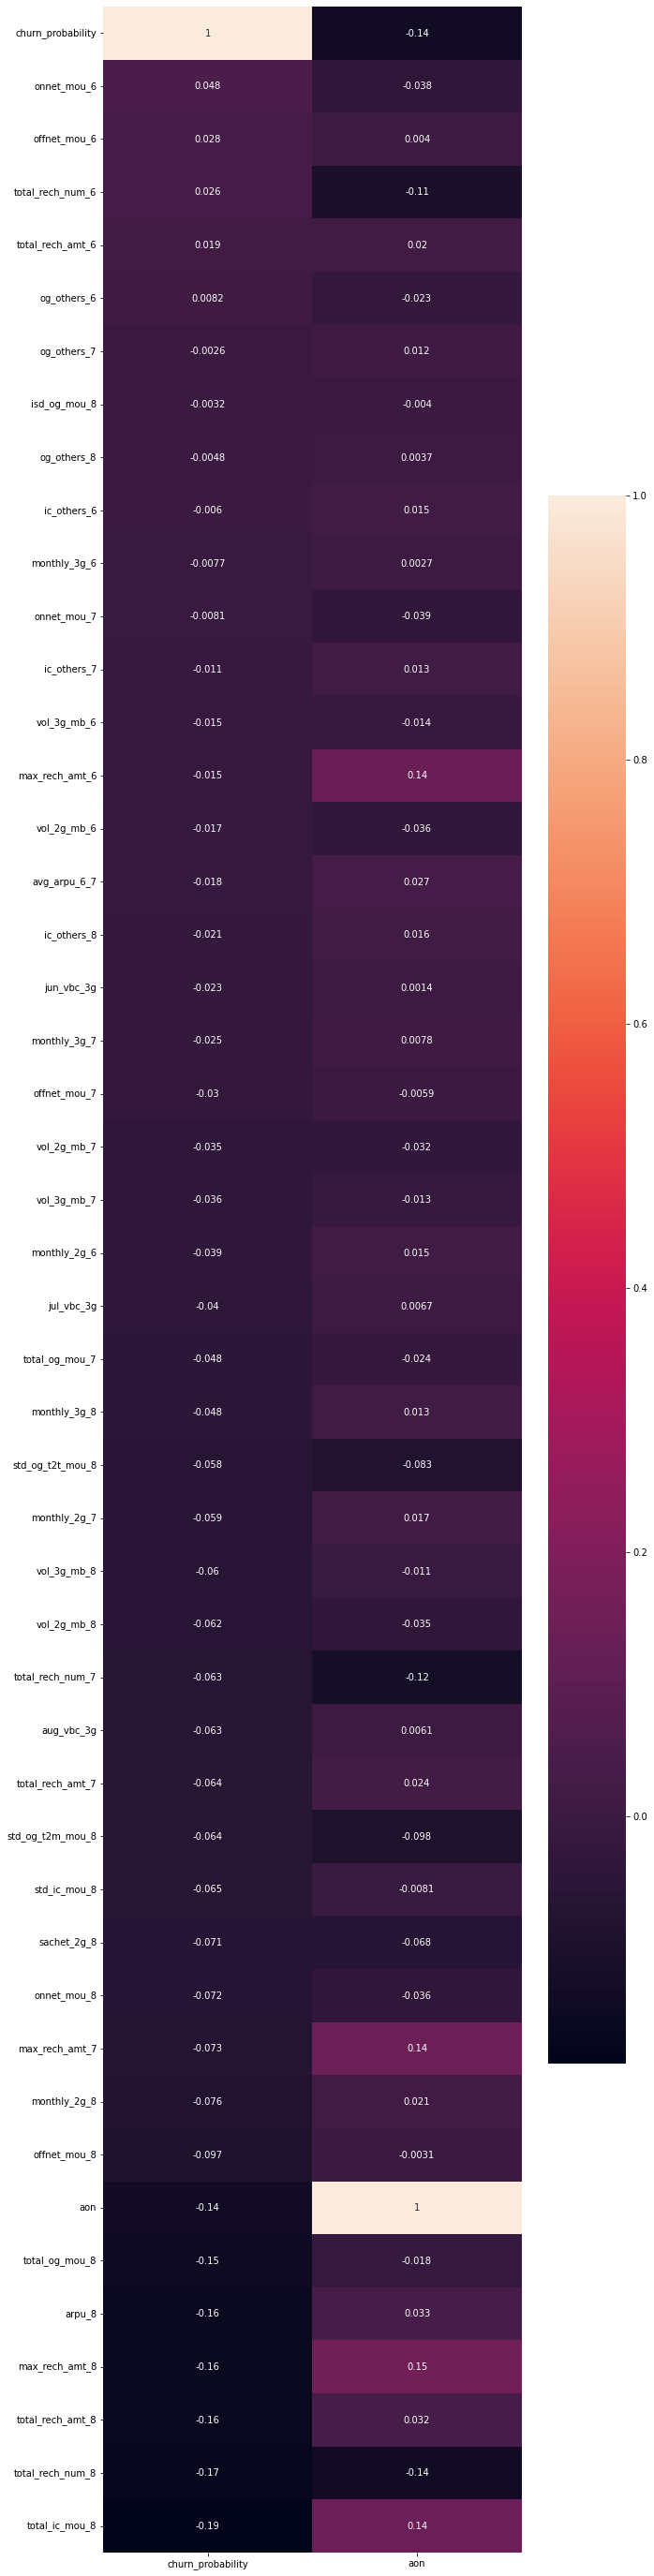

In [37]:
plt.figure(figsize=(10,50))
sns.heatmap(telecom_train_df.corr()[['churn_probability','aon']].sort_values(ascending=False, by='churn_probability'), annot = True)
plt.show()


In [38]:
churn_Probability = sum(telecom_train_df["churn_probability"])
len_df=len(telecom_train_df["churn_probability"].index)
churn_rate=(churn_Probability/len_df)*100
print(churn_rate)

10.188716981671167


In [39]:
#remove the outlier using IQR 
Q1 = telecom_train_df.quantile(0.05)
Q3 = telecom_train_df.quantile(0.95)
IQR = Q3 - Q1

telecom_train_df = telecom_train_df[~((telecom_train_df < (Q1 - 1.5 * IQR)) |(telecom_train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [40]:
from sklearn.model_selection import train_test_split
X = telecom_train_df.drop("churn_probability", axis = 1)
y = telecom_train_df.churn_probability
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(43558, 47)
(10890, 47)
(10890,)
(43558,)


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43558 entries, 7975 to 22589
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arpu_8            43558 non-null  float64
 1   onnet_mou_6       43558 non-null  float64
 2   onnet_mou_7       43558 non-null  float64
 3   onnet_mou_8       43558 non-null  float64
 4   offnet_mou_6      43558 non-null  float64
 5   offnet_mou_7      43558 non-null  float64
 6   offnet_mou_8      43558 non-null  float64
 7   std_og_t2t_mou_8  43558 non-null  float64
 8   std_og_t2m_mou_8  43558 non-null  float64
 9   isd_og_mou_8      43558 non-null  float64
 10  og_others_6       43558 non-null  float64
 11  og_others_7       43558 non-null  float64
 12  og_others_8       43558 non-null  float64
 13  total_og_mou_7    43558 non-null  float64
 14  total_og_mou_8    43558 non-null  float64
 15  std_ic_mou_8      43558 non-null  float64
 16  total_ic_mou_8    43558 non-null  flo

In [43]:
numeric_cols = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [44]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [45]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                43558
Model:                            GLM   Df Residuals:                    43513
Model Family:                Binomial   Df Model:                           44
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9050.5
Date:                Wed, 12 Oct 2022   Deviance:                       18101.
Time:                        12:15:49   Pearson chi2:                 7.63e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2393
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8691      0.075    -11.588      0.000      -1.016      -0.722
arpu_8              -0.3560      0.934     -0.381      0.703      -2.187       1.475
onnet_mou_6          0.1031      0.233      0.443      0.658      -0.353       0.559
onnet_mou_7          2.9275      0.634      4.618      0.000       1.685       4.170
onnet_mou_8         14.2656      1.163     12.268      0.000      11.986      16.545
offnet_mou_6         0.1369      0.275      0.497      0.619      -0.403       0.676
offnet_mou_7         3.6876      0.735      5.019      0.000       2.248       5.128
offnet_mou_8        23.5284      0.959     24.524      0.000      21.648      25.409
std_og_t2t_mou_8     6.9321      1.155      6.002      0.000       4.668       9.196
std_og_t2m_mou_8     3.6556      0.758      4.826      0.000       2.171       5.140
isd_og_mou_8      2.629e-13   1.21e-14     21.717      0.000    2.39e-13    2.87e-13
og_others_6          0.0492      0.147      0.335      0.737      -0.239       0.337
og_others_7       9.156e-14    5.2e-15     17.592      0.000    8.14e-14    1.02e-13
og_others_8      -5.386e-14   2.21e-15    -24.328      0.000   -5.82e-14   -4.95e-14
total_og_mou_7      -4.5354      1.038     -4.370      0.000      -6.569      -2.501
total_og_mou_8     -41.6710      1.800    -23.147      0.000     -45.200     -38.143
std_ic_mou_8         2.3361      0.344      6.782      0.000       1.661       3.011
total_ic_mou_8     -17.7997      0.905    -19.676      0.000     -19.573     -16.027
ic_others_6          0.2948      0.223      1.325      0.185      -0.141       0.731
ic_others_7         -0.8034      0.280     -2.872      0.004      -1.352      -0.255
ic_others_8         -3.4867      0.535     -6.511      0.000      -4.536      -2.437
total_rech_num_6    -0.1714      0.282     -0.608      0.543      -0.724       0.381
total_rech_num_7     0.8953      0.357      2.505      0.012       0.195       1.596
total_rech_num_8    -3.1047      0.443     -7.008      0.000      -3.973      -2.236
total_rech_amt_6    -1.1289      0.744     -1.517      0.129      -2.587       0.329
total_rech_amt_7    -2.1985      0.793     -2.774      0.006      -3.752      -0.645
total_rech_amt_8    -8.9056      1.109     -8.028      0.000     -11.080      -6.731
max_rech_amt_6      -0.4798      0.257     -1.864      0.062      -0.984       0.025
max_rech_amt_7      -1.1713      0.280     -4.190      0.000      -1.719      -0.623
max_rech_amt_8      -0.9630      0.362     -2.661      0.008      -1.672      -0.254
vol_2g_mb_6          0.0096      0.225      0.043      0.966      -0.431       0.450
vol_2g_mb_7          0.5628      0.265      2.125      0.034       0.044       1.082
vol_2g_mb_8         -1.1730      0.414     -2.835      0.005      -1.984      -0.362
vol_3g_mb_6         -0.

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 9),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 8),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('std_og_t2t_mou_8', False, 12),
 ('std_og_t2m_mou_8', False, 13),
 ('isd_og_mou_8', False, 28),
 ('og_others_6', False, 25),
 ('og_others_7', False, 27),
 ('og_others_8', False, 26),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', True, 1),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('ic_others_6', False, 19),
 ('ic_others_7', False, 2),
 ('ic_others_8', True, 1),
 ('total_rech_num_6', False, 23),
 ('total_rech_num_7', False, 16),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_6', False, 14),
 ('total_rech_amt_7', False, 15),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_6', False, 10),
 ('max_rech_amt_7', True, 1),
 ('max_rech_amt_8', True, 1),
 ('vol_2g_mb_6', False, 22),
 ('vol_2g_mb_7', False, 7),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_6', False, 24),
 ('vol_3g_mb_7', Fa

In [48]:
rfe_columns=X_train.columns[rfe.support_]
X_train_SM = sm.add_constant(X_train[rfe_columns])
logm2 = sm.GLM(y_train,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                43558
Model:                            GLM   Df Residuals:                    43537
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9118.3
Date:                Wed, 12 Oct 2022   Deviance:                       18237.
Time:                        12:16:15   Pearson chi2:                 5.01e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2369
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7455      0.059    -12.734      0.000      -0.860      -0.631
arpu_8              -1.7449      0.864     -2.019      0.043      -3.438      -0.051
onnet_mou_7          3.0014      0.587      5.113      0.000       1.851       4.152
onnet_mou_8         17.0189      0.671     25.350      0.000      15.703      18.335
offnet_mou_7         3.7279      0.683      5.458      0.000       2.389       5.067
offnet_mou_8        22.1165      0.749     29.535      0.000      20.649      23.584
total_og_mou_7      -4.5414      1.018     -4.460      0.000      -6.537      -2.546
total_og_mou_8     -31.4870      1.032    -30.497      0.000     -33.511     -29.463
std_ic_mou_8         3.2145      0.325      9.891      0.000       2.578       3.851
total_ic_mou_8     -21.0992      0.825    -25.560      0.000     -22.717     -19.481
ic_others_8         -3.6737      0.536     -6.852      0.000      -4.725      -2.623
total_rech_num_8    -2.3475      0.396     -5.931      0.000      -3.123      -1.572
total_rech_amt_8    -8.7527      1.062     -8.244      0.000     -10.834      -6.672
max_rech_amt_7      -1.6635      0.202     -8.221      0.000      -2.060      -1.267
max_rech_amt_8      -1.1186      0.348     -3.210      0.001      -1.801      -0.436
vol_2g_mb_8         -0.8869      0.362     -2.451      0.014      -1.596      -0.178
vol_3g_mb_8         -1.4547      0.381     -3.822      0.000      -2.201      -0.709
monthly_2g_7        -0.9503      0.248     -3.827      0.000      -1.437      -0.464
sachet_2g_8         -0.9611      0.272     -3.538      0.000      -1.494      -0.429
aon                 -1.1123      0.109    -10.183      0.000      -1.326      -0.898
avg_arpu_6_7         3.8448      0.358     10.751      0.000       3.144       4.546
====================================================================================
"""

In [49]:
rfe_columns

Index(['arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_7', 'total_og_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_7',
       'max_rech_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_7',
       'sachet_2g_8', 'aon', 'avg_arpu_6_7'],
      dtype='object')

In [50]:
# Identify the Predicted Value
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]


array([0.00329464, 0.00146273, 0.0051181 , 0.19796902, 0.11313003,
       0.01925693, 0.00822266, 0.19290479, 0.01492321, 0.02651619])

In [51]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.003295
1,0,0.001463
2,0,0.005118
3,1,0.197969
4,0,0.113130


In [52]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.003295,0
1,0,0.001463,0
2,0,0.005118,0
3,1,0.197969,0
4,0,0.113130,0


In [53]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[38204   604]
 [ 2547  2203]]


In [54]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [55]:
print("Sensitivity = ",TP / float(TP+FN))
print("Specificity = ",TN / float(TN+FP))
print("False Positive Rate = ",FP/ float(TN+FP))
print ("Precision = ",TP / float(TP+FP))
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))
print ("Accurecy = ",float(TP+TN) / float(TN+ FN +TP + FP))

Sensitivity =  0.46378947368421053
Specificity =  0.984436198721913
False Positive Rate =  0.015563801278086993
Precision =  0.7848236551478447
True Negative Prediction Rate =  0.9374984662953056
Accurecy =  0.9276596721612562


In [56]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

In [57]:
def rocCurve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr)
    plt.xlabel('False Positive Rate]')
    plt.ylabel('True Positive Rate')
    plt.show()


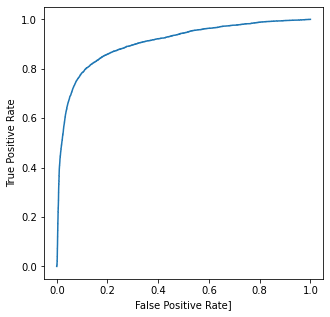

In [58]:
rocCurve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [59]:
X_test.shape

(10890, 47)

In [60]:
# Identify the Predicted Value
X_test_sm = sm.add_constant(X_test[rfe_columns])
X_test_sm.shape
#X_test_sm = X_test_sm.values.reshape(-1)

(10890, 21)

In [61]:
y_test_sm_pred = res.predict(X_test_sm)
y_test_sm_pred = y_test_sm_pred.values.reshape(-1)
y_test_sm_pred[:10]

array([1.81989236e-03, 3.98623198e-03, 9.10114774e-02, 3.90004484e-05,
       6.45254056e-02, 2.41941371e-02, 1.02730671e-01, 5.58272988e-02,
       2.21451544e-02, 2.93262222e-01])

In [62]:
y_test_sm_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':y_test_sm_pred})
y_test_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.001820
1,0,0.003986
2,0,0.091011
3,0,0.000039
4,0,0.064525


In [63]:
y_test_sm_pred_final['churn_pred'] = y_test_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_test_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.001820,0
1,0,0.003986,0
2,0,0.091011,0
3,0,0.000039,0
4,0,0.064525,0


In [64]:
# Let's check the overall Test accuracy for the SM model.
metrics.accuracy_score(y_test_sm_pred_final.Converted, y_test_sm_pred_final.churn_pred)

0.9258953168044077

In [65]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003295,0,1,0,0,0,0,0,0,0,0,0
1,0,0.001463,0,1,0,0,0,0,0,0,0,0,0
2,0,0.005118,0,1,0,0,0,0,0,0,0,0,0
3,1,0.197969,0,1,1,0,0,0,0,0,0,0,0
4,0,0.113130,0,1,1,0,0,0,0,0,0,0,0


In [66]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.109050     1.000000     0.000000
0.1          0.1  0.808187     0.858105     0.802077
0.2          0.2  0.897723     0.763579     0.914141
0.3          0.3  0.923527     0.660842     0.955679
0.4          0.4  0.927912     0.527579     0.976912
0.5          0.5  0.927660     0.463789     0.984436
0.6          0.6  0.925984     0.416632     0.988327
0.7          0.7  0.919234     0.323368     0.992167
0.8          0.8  0.897883     0.087579     0.997062
0.9          0.9  0.891203     0.012421     0.998763


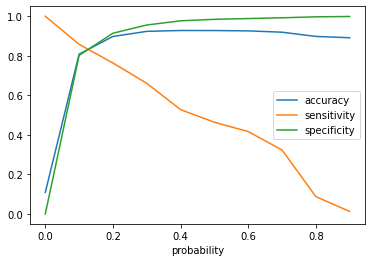

In [67]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [68]:
numbers = [0.02,0.04,0.06,0.06,0.1,0.12,0.14,0.16,0.18]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.02,0.04,0.06,0.12,0.14,0.16,0.18
0,0,0.003295,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.001463,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.005118,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.197969,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
4,0,0.113130,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0


In [69]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.02,0.04,0.06,0.06,0.1,0.12,0.14,0.16,0.18]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.02         0.02  0.530626     0.950105     0.479283
0.04         0.04  0.646632     0.918737     0.613327
0.06         0.06  0.719730     0.896842     0.698052
0.10         0.10  0.808187     0.858105     0.802077
0.12         0.12  0.836953     0.835579     0.837121
0.14         0.14  0.858327     0.818316     0.863224
0.16         0.16  0.875362     0.801263     0.884431
0.18         0.18  0.888425     0.782526     0.901386


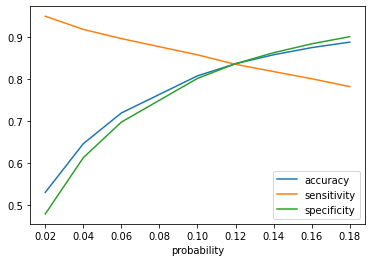

In [70]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [71]:
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.12 else 0)

In [72]:
print("accurecy  is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

accurecy  is: 0.8369530281463795


In [73]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[32487  6321]
 [  781  3969]]


In [74]:
TP2 = confusion2[1,1] 
TN2 = confusion2[0,0] 
FP2 = confusion2[0,1] 
FN2 = confusion2[1,0] 
print("Sensitivity = ",TP2 / float(TP2+FN2))
print("Specificity = ",TN2 / float(TN2+FP2))
print ("Precision = ",TP2 / float(TP2+FP2))
print ("TNPR = ",TN2 / float(TN2 + FN2))
print("FPR = ",FP2/ float(TN2+FP2))

Sensitivity =  0.8355789473684211
Specificity =  0.8371212121212122
Precision =  0.38571428571428573
TNPR =  0.9765239870145486
FPR =  0.16287878787878787


In [75]:
y_test_sm_pred_final['churn_pred_final'] = y_test_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.12 else 0)

y_test_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,churn_pred_final
0,0,0.001820,0,0
1,0,0.003986,0,0
2,0,0.091011,0,0
3,0,0.000039,0,0
4,0,0.064525,0,0


In [76]:
print("final test accurecy  is:",metrics.accuracy_score(y_test_sm_pred_final.Converted, y_test_sm_pred_final.churn_pred_final))

final test accurecy  is: 0.8367309458218549


Lasso Regression

In [77]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [78]:
# list of alphas to tune
params = {'alpha': [0.0001,  0.01, 0.05, 0.1, 
 0.2, 0.3, 0.5, 0.6, 0.7,  0.9, 1.0, 2.0, 3.0, 
  5.0, 8.0, 9.0, 10.0, 20, 50, 100 ]}
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6,
                                   0.7, 0.9, 1.0, 2.0, 3.0, 5.0, 8.0, 9.0, 10.0,
                                   20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# Printing the best hyperparameter alpha for Lasso
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [80]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [81]:
lasso.coef_

array([-4.22388415e-01,  7.03571501e-02,  1.27807953e-01,  2.45331559e+00,
        4.61315485e-02,  1.09914990e-01,  3.26086716e+00,  1.70048925e-02,
       -6.31267652e-02,  0.00000000e+00,  1.04639384e-02,  0.00000000e+00,
        0.00000000e+00, -1.62332534e-01, -4.66274128e+00, -1.84245613e-02,
       -2.62513316e-01, -0.00000000e+00, -3.73226016e-02, -9.78239976e-02,
        2.70604624e-02,  1.57725092e-02, -3.07942709e-01, -1.38998957e-02,
       -1.60370125e-01, -1.05399553e-01,  1.73058794e-02, -8.40686885e-02,
       -2.97967762e-01,  0.00000000e+00,  3.49154197e-03, -1.85375129e-02,
       -1.17811168e-02, -0.00000000e+00,  0.00000000e+00, -2.61945189e-02,
       -2.74921047e-02,  2.38734193e-02, -4.37595519e-02, -0.00000000e+00,
        0.00000000e+00,  5.24712876e-02, -1.08094707e-01,  0.00000000e+00,
        0.00000000e+00,  4.23339369e-02,  4.91896959e-01])

In [82]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [83]:
y_train

7975     0
55860    0
29083    0
56711    1
4569     0
        ..
35854    1
64872    0
37392    0
51450    0
22589    0
Name: churn_probability, Length: 43558, dtype: int64

In [84]:
y_pred_train

array([-0.07546197, -0.17920796, -0.02454413, ..., -0.00357063,
       -0.03497204,  0.23835144])

In [85]:
y_train_lasso_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_pred_train})
y_train_lasso_pred_final.head()

,Converted,Converted_prob
0,0,-0.075462
1,0,-0.179208
2,0,-0.024544
3,1,0.154349
4,0,0.166562


In [86]:
y_train_lasso_pred_final['final_churn_pred'] = y_train_lasso_pred_final.Converted_prob.map( lambda x: 1 if x > 0.12 else 0)

In [87]:
confusion3 = metrics.confusion_matrix(y_train_lasso_pred_final.Converted, y_train_lasso_pred_final.final_churn_pred )
print(confusion3)

[[26137 12671]
 [  506  4244]]


In [88]:
TP = confusion3[1,1] 
TN = confusion3[0,0] 
FP = confusion3[0,1] 
FN = confusion3[1,0]

In [89]:
print("Sensitivity = ",TP / float(TP+FN))
print("Specificity = ",TN / float(TN+FP))
print("False Positive Rate = ",FP/ float(TN+FP))
print ("Precision = ",TP / float(TP+FP))
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))
print ("Accurecy = ",float(TP+TN) / float(TN+ FN +TP + FP))

Sensitivity =  0.8934736842105263
Specificity =  0.6734951556380128
False Positive Rate =  0.32650484436198723
Precision =  0.25090156665681346
True Negative Prediction Rate =  0.9810081447284466
Accurecy =  0.6974838146838698


Xgboost Classifier

In [90]:
#import xgboost as xgb  # Load this xgboost
#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
#from sklearn.metrics import accuracy_score, log_loss

In [91]:
#xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
#xgb_cfl.get_params()

In [92]:
# A parameter grid for XGBoost
#params = {
 #       'n_estimators' : [10, 50, 100, 150], # no of trees 
  #      'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
   #     'min_child_weight': [1, 5, 7, 10],
    #    'gamma': [0.1, 1, 1.5, 5],
    #    'subsample': [0.6, 0.8, 1.0],
    #    'colsample_bytree': [0.6, 0.8, 1.0],
    #    'max_depth': [3, 4, 5, 10]
    #   }

#folds = 5

#param_comb = 100

#random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)

In [93]:
#random_search.fit(X_train, y_train)

In [94]:
#print('\n Best estimator:')
#print(random_search.best_estimator_)
#print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
#print(random_search.best_score_ )
#print('\n Best hyperparameters:')
#print(random_search.best_params_)

In [95]:
#xgb_predictions_hpt = random_search.predict(X_test)
#accuracy_score(y_test, xgb_predictions_hpt)

In [96]:
#xgb_cfl.feature_importances_

Using Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [98]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [99]:
%%time
rf.fit(X_train, y_train)

CPU times: user 485 ms, sys: 1.02 ms, total: 486 ms
Wall time: 486 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [100]:
rf.oob_score_

0.9332154828045365

In [101]:
from sklearn.metrics import plot_roc_curve

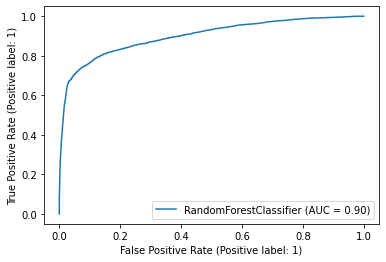

In [102]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

Hyper-parameter tuning for the Random Forest

In [103]:
rfh = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [104]:
grid_search = GridSearchCV(estimator=rfh,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [105]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 19.2 s, sys: 596 ms, total: 19.8 s
Wall time: 7min 57s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [106]:
grid_search.best_score_

0.940906360712629

In [107]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

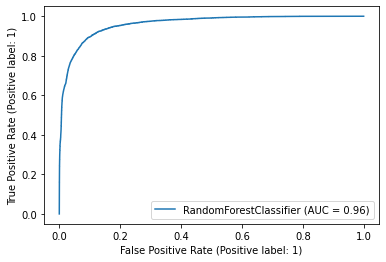

In [108]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [109]:
rf_best.feature_importances_

array([9.82575044e-02, 9.44879198e-03, 1.00339664e-02, 2.54728023e-02,
       8.71424844e-03, 1.33229595e-02, 3.62713989e-02, 6.14926288e-03,
       2.29365873e-02, 0.00000000e+00, 1.36472448e-03, 0.00000000e+00,
       0.00000000e+00, 3.78543006e-02, 1.84540042e-01, 2.25557946e-02,
       2.77870455e-01, 1.20703940e-03, 1.17287945e-03, 4.66890135e-03,
       5.46116396e-03, 1.21756323e-02, 2.10594529e-02, 6.42314470e-03,
       1.36939105e-02, 5.68173246e-02, 4.48503844e-03, 8.73589356e-03,
       4.65970078e-02, 2.53835595e-03, 3.25789010e-03, 9.55487151e-03,
       2.39397888e-03, 4.09877590e-03, 7.95826501e-03, 2.02748958e-04,
       3.71279262e-04, 3.59875875e-04, 1.33315011e-03, 4.78715193e-04,
       6.24222669e-04, 8.12548036e-04, 1.29101048e-02, 2.53792671e-03,
       1.45489948e-03, 1.33524638e-03, 1.04869175e-02])

In [110]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [111]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
16,total_ic_mou_8,0.277870
14,total_og_mou_8,0.184540
0,arpu_8,0.098258
25,total_rech_amt_8,0.056817
28,max_rech_amt_8,0.046597
13,total_og_mou_7,0.037854
6,offnet_mou_8,0.036271
3,onnet_mou_8,0.025473
8,std_og_t2m_mou_8,0.022937
15,std_ic_mou_8,0.022556


In [112]:
afC_Best = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)


In [113]:
afC_Best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [114]:
prediction = afC_Best.predict(X_test)

In [115]:
#RF accuracy Score for the nest estimator from the grid search
accuracy_score(y_test, prediction)

0.9378328741965105

#PCA

In [116]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [117]:
pca.fit(X_train)

PCA(random_state=42)

In [118]:
pca.explained_variance_ratio_

array([1.87074121e-01, 1.23820469e-01, 9.03024395e-02, 5.57940343e-02,
       5.40646167e-02, 4.64650597e-02, 4.40840330e-02, 3.61281697e-02,
       2.85724014e-02, 2.52104946e-02, 2.35822882e-02, 2.33308540e-02,
       2.26518517e-02, 2.14998867e-02, 1.71918471e-02, 1.70468973e-02,
       1.45342063e-02, 1.42719986e-02, 1.30533957e-02, 1.26158594e-02,
       1.19816802e-02, 1.15753064e-02, 1.13436943e-02, 1.05454417e-02,
       1.02405331e-02, 9.51356403e-03, 7.90540641e-03, 7.42133817e-03,
       6.87705858e-03, 6.44711895e-03, 5.69383483e-03, 5.44410610e-03,
       4.53690715e-03, 4.00332160e-03, 3.20837316e-03, 3.13043790e-03,
       2.46792062e-03, 2.02649283e-03, 1.60504358e-03, 1.13667103e-03,
       6.48313081e-04, 4.24064466e-04, 3.85491452e-04, 1.42956694e-04,
       1.26259777e-33, 1.26259777e-33, 1.26259777e-33])

<BarContainer object of 47 artists>

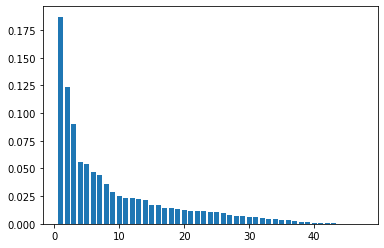

In [119]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [120]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

Making a scree plot for the explained variance

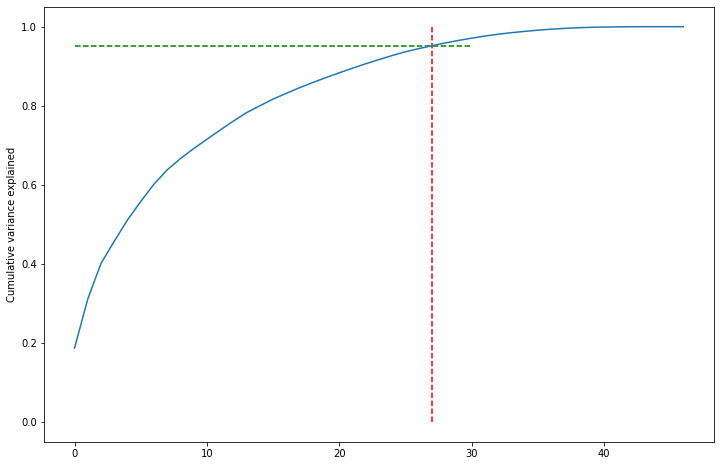

In [121]:
#plt.plot(range(1,len(var_cumu)+1), var_cumu)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=27, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA

In [122]:
#pca_final = PCA(n_components=27, random_state=42)
pca_final = PCA(0.9)

In [123]:
df_train_pca = pca_final.fit_transform(X_train)

In [124]:
df_train_pca.shape

(43558, 23)

In [125]:
#X_train_transformed = pd.DataFrame(df_train_pca,columns=["PC1", "PC2","PC3", "PC4","PC5", "PC6","PC7", "PC8","PC9", "PC10", "PC11", "PC12","PC13", "PC14","PC15", "PC16","PC17", "PC18","PC19", "PC20", "PC21", "PC22","PC23", "PC24","PC25", "PC26","PC27"])
#X_train_transformed.head()
pd.DataFrame(df_train_pca)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.120409,-0.258802,0.021213,0.075474,0.060725,-0.094347,-0.278995,-0.162008,0.156594,0.294847,...,0.152456,-0.030557,-0.073390,-0.030087,-0.057139,0.089712,-0.100300,0.061481,-0.007672,0.142157
1,0.638346,-0.468010,0.060640,-0.335818,0.758188,-0.296071,-0.530399,-0.029320,0.027723,-0.079788,...,0.114772,-0.107510,-0.153196,-0.008342,-0.057506,-0.038130,0.001756,0.095362,0.393651,-0.191859
2,-0.157462,0.219899,-0.471570,0.101979,0.162562,-0.038001,-0.047580,0.105382,-0.044781,0.087057,...,0.000019,0.057617,-0.000821,-0.053822,-0.039833,-0.019947,-0.000697,-0.014141,-0.026653,0.015478
3,-0.341107,0.092980,-0.324641,-0.013612,0.064962,0.032468,-0.032807,-0.046458,-0.158258,-0.017601,...,0.137256,-0.028911,0.039805,0.017489,0.006115,0.011330,-0.002613,0.069494,0.006050,-0.005660
4,-0.300403,-0.077367,0.220672,0.154015,0.090517,0.012375,0.016300,0.154923,-0.039392,-0.017517,...,-0.043104,0.049171,0.015772,-0.015233,-0.006179,0.006197,0.001326,0.004679,0.015329,0.022599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43553,-0.177403,-0.100230,0.037178,-0.068772,-0.006762,0.034436,0.055084,-0.005675,-0.089324,-0.045615,...,0.037827,-0.019914,-0.007348,-0.004257,0.005172,-0.086217,0.025911,-0.041516,-0.025452,-0.017229
43554,0.011637,-0.044591,-0.288179,0.232978,0.039780,0.187445,-0.107554,-0.143020,-0.039481,0.131891,...,-0.032047,0.004119,-0.028596,-0.014674,-0.011762,-0.009980,0.004806,-0.003657,0.032386,-0.021481
43555,0.014448,-0.049817,-0.050433,0.001627,-0.090933,-0.065752,-0.029260,0.015886,0.222659,-0.074359,...,-0.016243,-0.018862,0.004209,-0.063844,-0.084484,0.022949,0.145659,-0.006564,-0.057140,-0.043498
43556,-0.069039,0.084397,-0.407189,0.081972,0.027403,-0.003513,-0.086349,-0.037291,0.113857,-0.053302,...,-0.061147,0.064145,-0.097044,0.107870,0.165254,0.078976,0.028613,0.013606,-0.040707,0.024802


In [126]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [127]:
corrmat.shape

(23, 23)

<AxesSubplot:>

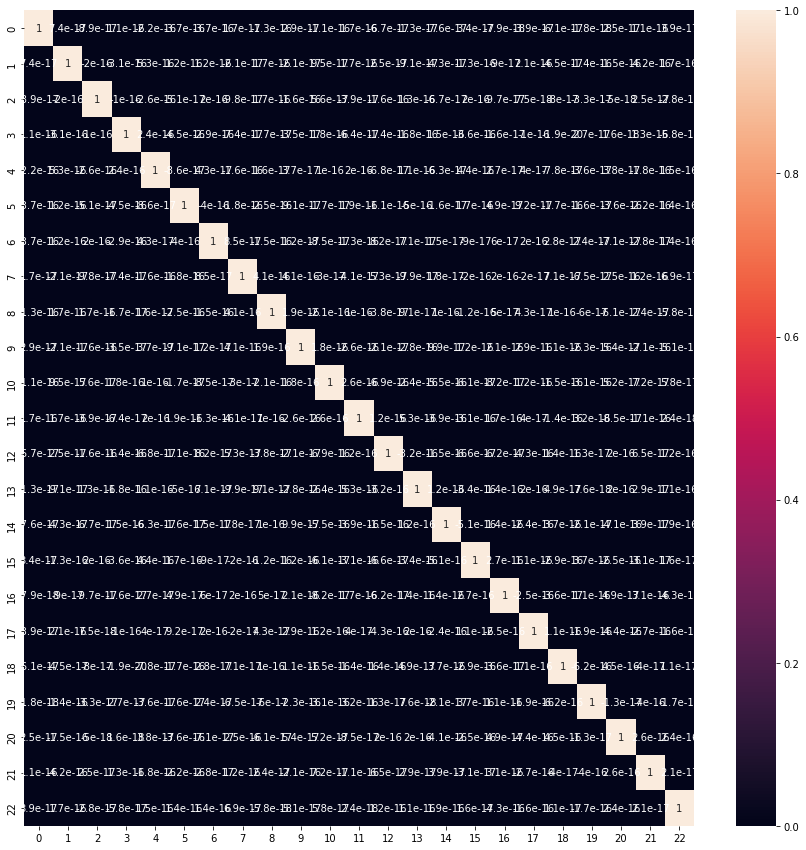

In [128]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [129]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(10890, 23)

##Applying logistic regression on the data on our Principal components

In [130]:
learner_pca = LogisticRegression()

In [131]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [132]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [133]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

In [134]:
y_test

6347     0
13939    0
31054    0
63559    0
40516    0
        ..
20221    0
40952    0
48831    0
25896    1
29507    1
Name: churn_probability, Length: 10890, dtype: int64

In [135]:
pred_probs_test[:,1]

array([0.00598742, 0.01489314, 0.13543263, ..., 0.00144808, 0.12733437,
       0.09750899])

In [136]:
pred_probs_test

array([[0.99401258, 0.00598742],
       [0.98510686, 0.01489314],
       [0.86456737, 0.13543263],
       ...,
       [0.99855192, 0.00144808],
       [0.87266563, 0.12733437],
       [0.90249101, 0.09750899]])

In [137]:
y_test_pca_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':pred_probs_test[:,1]})





In [138]:
y_test_pca_pred_final.head()

,Converted,Converted_prob
0,0,0.005987
1,0,0.014893
2,0,0.135433
3,0,0.000183
4,0,0.051432


In [139]:
y_test_pca_pred_final['final_churn_pred'] = y_test_pca_pred_final.Converted_prob.map(lambda x: 1 if x > 0.12 else 0)

In [140]:
y_test_pca_pred_final.head()

,Converted,Converted_prob,final_churn_pred
0,0,0.005987,0
1,0,0.014893,0
2,0,0.135433,1
3,0,0.000183,0
4,0,0.051432,0


In [141]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

In [142]:
# Display accuracy score
accuracy_score(y_test, y_test_pca_pred_final['final_churn_pred'])

0.7827364554637282

In [143]:
churn_test = pd.read_csv("../input/telecom-churn-case-study-hackathon-c40/test.csv")

In [144]:
churn_test.head()


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [145]:
churn_test.shape


(30000, 171)

In [146]:
churn_test.isnull().sum()


id                    0
circle_id             0
loc_og_t2o_mou      316
std_og_t2o_mou      316
loc_ic_t2o_mou      316
                  ...  
fb_user_8         22078
aon                   0
aug_vbc_3g            0
jul_vbc_3g            0
jun_vbc_3g            0
Length: 171, dtype: int64

Step 2: EDA

In [147]:
churn_id = churn_test['id']
churn_test['tenure'] = (churn_test['aon']/30).round(0)
churn_test["avg_arpu_6_7"]= (churn_test['arpu_6']+churn_test['arpu_7'])/2

churn_test = churn_test[X.columns]

In [148]:
churn_test.shape

(30000, 47)

In [149]:
churn_test_null = churn_test.isnull().sum().sum() / np.product(churn_test.shape) * 100
churn_test_null

1.6144680851063828

In [150]:
for col in churn_test.columns:
    null_col = churn_test[col].isnull().sum() / churn_test.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

arpu_8 : 0.00
onnet_mou_6 : 3.90
onnet_mou_7 : 3.91
onnet_mou_8 : 5.58
offnet_mou_6 : 3.90
offnet_mou_7 : 3.91
offnet_mou_8 : 5.58
std_og_t2t_mou_8 : 5.58
std_og_t2m_mou_8 : 5.58
isd_og_mou_8 : 5.58
og_others_6 : 3.90
og_others_7 : 3.91
og_others_8 : 5.58
total_og_mou_7 : 0.00
total_og_mou_8 : 0.00
std_ic_mou_8 : 5.58
total_ic_mou_8 : 0.00
ic_others_6 : 3.90
ic_others_7 : 3.91
ic_others_8 : 5.58
total_rech_num_6 : 0.00
total_rech_num_7 : 0.00
total_rech_num_8 : 0.00
total_rech_amt_6 : 0.00
total_rech_amt_7 : 0.00
total_rech_amt_8 : 0.00
max_rech_amt_6 : 0.00
max_rech_amt_7 : 0.00
max_rech_amt_8 : 0.00
vol_2g_mb_6 : 0.00
vol_2g_mb_7 : 0.00
vol_2g_mb_8 : 0.00
vol_3g_mb_6 : 0.00
vol_3g_mb_7 : 0.00
vol_3g_mb_8 : 0.00
monthly_2g_6 : 0.00
monthly_2g_7 : 0.00
monthly_2g_8 : 0.00
sachet_2g_8 : 0.00
monthly_3g_6 : 0.00
monthly_3g_7 : 0.00
monthly_3g_8 : 0.00
aon : 0.00
aug_vbc_3g : 0.00
jul_vbc_3g : 0.00
jun_vbc_3g : 0.00
avg_arpu_6_7 : 0.00


In [151]:
for col in churn_test.columns:
    null_col = churn_test[col].isnull().sum() / churn_test.shape[0] * 100
    if null_col > 0:
        churn_test[col] = churn_test[col].fillna(churn_test[col].mode()[0])

In [152]:
churn_test.isnull().sum().sum()


0

In [153]:
churn_test_final = pca_final.transform(churn_test)

In [154]:
churn_test_final.shape

(30000, 23)

In [155]:
predict_probalbilty = learner_pca.predict(churn_test_final)

In [156]:
final_prediction = pd.DataFrame({'id':churn_id,'churn_probability':predict_probalbilty})

In [157]:
final_prediction.to_csv('submission.csv',index=False)

Conclusion:

01. The incoming calls is the critical factor for churn. Suggestion is to focus on incoming calls data whose incoming calls turning lower.
02. From the SM Model total_ic_mou_8 , total_rech_amt_diff , total_og_mou_8 , arpu , roam_ic_mou_8 , roam_og_mou_8 , std_ic_mou_8, std_og_mou_8 , av_rech_amt_data_8 variables are key variables for Charm.
03. Lower tariffs on data usage,a better 2G area coverage where 3G is not available.This would reduce the churm
04. We need to Provide additional internet services on recharge to reduce the charm
05. From the EDA The ‘good & action’ phase Month_6 and Month_7 and The ‘churn’ phase Month_8
06. We get the  93% test accurecy on Random Forest Model